In [12]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

Black-Scholes Formulas

$$ C = S N(d_1) - K e^{-rT} N(d_2) $$

$$ P = K e^{-rT} N(-d_2) - S N(-d_1) $$

Where $ d_1 = \frac {\ln(\frac {S}{K}) + (r + \frac {1}{2} \sigma^2)T}{\sigma \sqrt T} $ and $ d_2 = d_1 - \sigma \sqrt T $

In [41]:
d1 = lambda S, K, r, t, vol : (np.log(S/K) + (r + (1/2) * sigma**2)*T) / (sigma * np.sqrt(T))
d2 = lambda S, K, r, t, vol : d1(S, K, r, t, vol) - sigma * np.sqrt(T)
call = lambda S, K, r, t, vol : S * ss.norm.cdf(d1(S, K, r, t, vol)) - K * np.exp(-r * T) * ss.norm.cdf(d2(S, K, r, t, vol))
put = lambda S, K, r, t, vol : -S * ss.norm.cdf(-d1(S, K, r, t, vol)) + K * np.exp(-r * T) * ss.norm.cdf(-d2(S, K, r, t, vol))

We will simulate stock prices using Geometric Brownian with the following equation:

$$ S_T = S_0 e^{(r - \frac {1}{2} \sigma^2)T + \sigma \sqrt {T} Z } $$

In [38]:
np.random.seed(5)

In [39]:
# Inputs
S0 = 50
r = .01
sigma = .3
T = 1/252
N = 20

# Generate Randoms
Z = ss.norm.rvs(size=N)

prices = [S0]
for i in range(len(Z)):
    prices += [prices[i - 1] * np.exp((r - 1/2 * sigma**2) * T + sigma * np.sqrt(T) * Z[i])]

In [47]:
K1 = 50
K2 = 51

calls = []
puts = []
for i in range(len(prices)):
    t = (N - i) * T
    S = prices[i]
    calls += [call(S, K1, r, t, sigma) - call(S, K2, r, t, sigma)]
    puts += [put(S, K1, r, t, sigma) - put(S, K2, r, t, sigma)]

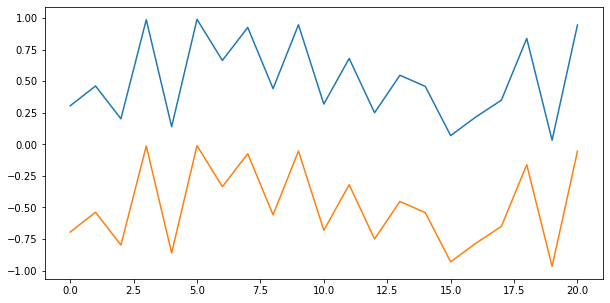

In [51]:
plt.figure(figsize=[10,5])

plt.plot(calls)
plt.plot(puts)

plt.show()

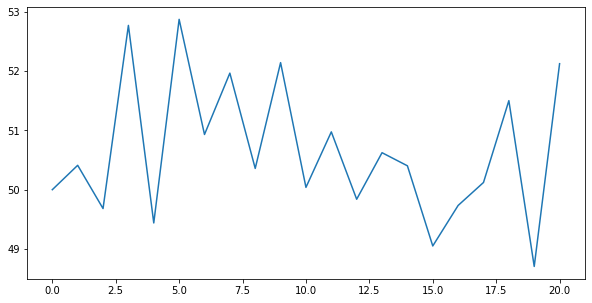

In [50]:
plt.figure(figsize=[10,5])

plt.plot(prices)

plt.show()